<a href="https://colab.research.google.com/github/Kittonn/intro-to-ml-and-dl/blob/main/W9_HW_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
# Check for CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, :2]  # Only first two features
y = california_housing.target.reshape(-1, 1)  # Reshape for PyTorch

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [7]:
# @title เเบบลบโค้ดบางส่วนออก
# Define the model (Linear Regression)
model = nn.Sequential(
    nn.Linear(2, 1)  # 2 input features → 1 output
)

# DIY : Manual Weight initialization (Use in part 3) -----------------------------------------------------------------------

# # Manually set weights (Use In Part 3)
# with torch.no_grad():
#     model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
#     model[0].bias.fill_(0.0)  # Optionally set bias to 0

# DIY : Manual Weight initialization (Use in part 3) -----------------------------------------------------------------------

# Define loss function and optimizer
criterion = nn.MSELoss()

# DIY : Choosing & Setting Optimizer -----------------------------------------------------------------------

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # SGD With Momentum
# optimizer = optim.Adagrad(model.parameters(), lr=0.001) # AdaGrad
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9) # RMSProp
# optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

# DIY : Choosing & Setting Optimizer -----------------------------------------------------------------------


# DIY : Choosing & Setting Scheduler -----------------------------------------------------------------------

# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) # Exponentialy lower learning rate
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9) # Lower learning rate every step size epochs

# DIY : Choosing & Setting Scheduler -----------------------------------------------------------------------



# Track parameter updates for visualization
num_epochs = 100
loss_history = []
theta_history = []

# Training loop
for epoch in range(num_epochs):
    outputs = model(X_train)

    # DIY : Training Loop ----------------------------------------------------------------------------------------

    # loss = # Calculate Loss Here

    # Zero past gradient here
    # Backward Propagation here
    # Optimizer and Scheduler step here


    # DIY : Training Loop ----------------------------------------------------------------------------------------

    # Store parameters for visualization
    theta = list(model.parameters())[0].detach().numpy().flatten()  # Get weight values
    theta_history.append(theta)
    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Convert to NumPy arrays
theta_history = np.array(theta_history)

# Generate Contour Plot --------------------------------------------------------------------------------------
theta1_vals = np.linspace(-2, 2, 100)
theta2_vals = np.linspace(-2, 2, 100)
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

# Compute the loss for each (θ1, θ2)
Z = np.zeros_like(T1)
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        test_theta = torch.tensor([[T1[i, j]], [T2[i, j]]], dtype=torch.float32)
        test_output = torch.matmul(torch.tensor(X_train.numpy()), test_theta)  # Forward pass
        Z[i, j] = torch.mean((test_output - y_train) ** 2).item()  # MSE loss

# Plot contour
plt.figure(figsize=(8, 6))
plt.contour(T1, T2, Z, levels=30, cmap='viridis')
plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro-', markersize=5, label="Gradient Descent Path")
plt.scatter(theta_history[0, 0], theta_history[0, 1], color='blue', marker='o', label="Start")
plt.scatter(theta_history[-1, 0], theta_history[-1, 1], color='red', marker='x', label="End")
plt.xlabel("Theta 1 (Weight 1)")
plt.ylabel("Theta 2 (Weight 2)")
plt.title("Gradient Descent in Parameter Space")
plt.legend()
plt.show()

NameError: name 'loss' is not defined

Epoch 0: Loss = 16.329748
Epoch 10: Loss = 14.080916
Epoch 20: Loss = 10.463144
Epoch 30: Loss = 7.309886
Epoch 40: Loss = 5.006013
Epoch 50: Loss = 3.445766
Epoch 60: Loss = 2.427352
Epoch 70: Loss = 1.774860
Epoch 80: Loss = 1.360696
Epoch 90: Loss = 1.098973


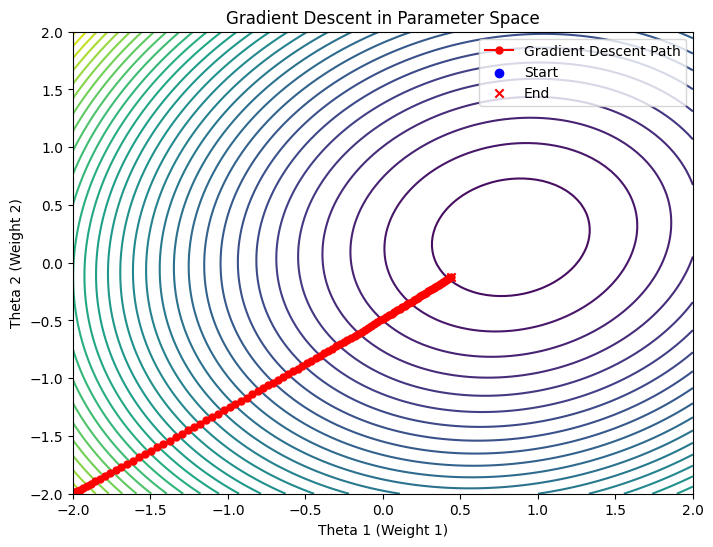

In [ ]:
# @title เเบบเต็ม
# Define the model (Linear Regression)
model = nn.Sequential(
    nn.Linear(2, 1)  # 2 input features → 1 output
)

# Manually set weights (Use In Part 2)
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
    model[0].bias.fill_(0.0)  # Optionally set bias to 0

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # SGD With Momentum
# optimizer = optim.Adagrad(model.parameters(), lr=0.001) # AdaGrad
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9) # RMSProp
# optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) # Exponentialy lower learning rate
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9) # Lower learning rate every step size epochs



# Track parameter updates for visualization
num_epochs = 100
loss_history = []
theta_history = []

# Training loop
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store parameters for visualization
    theta = list(model.parameters())[0].detach().numpy().flatten()  # Get weight values
    theta_history.append(theta)
    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Convert to NumPy arrays
theta_history = np.array(theta_history)

# ---- Generate Contour Plot ----
theta1_vals = np.linspace(-2, 2, 100)
theta2_vals = np.linspace(-2, 2, 100)
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

# Compute the loss for each (θ1, θ2)
Z = np.zeros_like(T1)
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        test_theta = torch.tensor([[T1[i, j]], [T2[i, j]]], dtype=torch.float32)
        test_output = torch.matmul(torch.tensor(X_train.numpy()), test_theta)  # Forward pass
        Z[i, j] = torch.mean((test_output - y_train) ** 2).item()  # MSE loss

# Plot contour
plt.figure(figsize=(8, 6))
plt.contour(T1, T2, Z, levels=30, cmap='viridis')
plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro-', markersize=5, label="Gradient Descent Path")
plt.scatter(theta_history[0, 0], theta_history[0, 1], color='blue', marker='o', label="Start")
plt.scatter(theta_history[-1, 0], theta_history[-1, 1], color='red', marker='x', label="End")
plt.xlabel("Theta 1 (Weight 1)")
plt.ylabel("Theta 2 (Weight 2)")
plt.title("Gradient Descent in Parameter Space")
plt.legend()
plt.show()

In [ ]:
# @title Full implementation via Torch package for end-to-end training and validation with changing optimizers and schedulers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the California housing dataset
data = fetch_california_housing()

# Get the features and target
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

###############################################
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(in_features=8, out_features=64)  # 8 input features in California housing dataset
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)  # Single output for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = ANN()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.Adagrad(model.parameters(), lr=0.001) # AdaGrad
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9) # RMSProp
# optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam

# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) # Exponentialy lower learning rate
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9) # Lower learning rate every step size epochs


num_epochs = 100

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # scheduler.step()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    # Validation
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

        avg_test_loss = test_loss / len(test_loader)
        print(f'Test Loss: {avg_test_loss:.4f}')



Epoch [1/100], Loss: 63.0233
Test Loss: 1.5733
Epoch [2/100], Loss: 1.2376
Test Loss: 1.0612
Epoch [3/100], Loss: 1.1565
Test Loss: 1.0749
Epoch [4/100], Loss: 1.2388
Test Loss: 0.9360
Epoch [5/100], Loss: 1.5469
Test Loss: 0.8185
Epoch [6/100], Loss: 0.9279
Test Loss: 0.7227
Epoch [7/100], Loss: 0.8688
Test Loss: 0.6657
Epoch [8/100], Loss: 1.0092
Test Loss: 1.0618
Epoch [9/100], Loss: 2.3687
Test Loss: 0.7923
Epoch [10/100], Loss: 0.7319
Test Loss: 0.8301
Epoch [11/100], Loss: 2.5171
Test Loss: 0.6795
Epoch [12/100], Loss: 0.7772
Test Loss: 0.6678
Epoch [13/100], Loss: 0.9100
Test Loss: 0.6290
Epoch [14/100], Loss: 2.7342
Test Loss: 0.8416
Epoch [15/100], Loss: 0.7053
Test Loss: 0.6365
Epoch [16/100], Loss: 0.7178
Test Loss: 0.6291
Epoch [17/100], Loss: 0.8566
Test Loss: 0.6244
Epoch [18/100], Loss: 0.7054
Test Loss: 0.6158
Epoch [19/100], Loss: 0.6526
Test Loss: 0.6067
Epoch [20/100], Loss: 0.9760
Test Loss: 0.6734
Epoch [21/100], Loss: 0.7434
Test Loss: 0.6231
Epoch [22/100], Loss:

# HW
--------------------จากตัวอย่างแรก น้ำหนักแบบสุ่มจากโมเดล nn.Linear(2, 1)----------------------
```python
model = nn.Sequential(
    nn.Linear(2, 1)  # 2 input features → 1 output
)

# Manually set weights (Use In Part 2)
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
    model[0].bias.fill_(0.0)  # Optionally set bias to 0
```

1.) ให้ทดสอบโมเดลด้วย 4 Optimizers (SGD w/ Momentum, AdaGrad, RMSProp, Adam) พร้อมกับ 3 รูปแบบของ Learning Rate Scheduler (ไม่มี, Exponential Decay, Step Decay) ใช้ จำนวน Epoch เท่ากัน (200 Epochs), ไม่เปลี่ยนค่าเริ่มต้นของ Weights (ใช้ค่าเริ่มต้นจาก nn.Linear), พล็อต Contour Gradient Space พร้อมแสดง Descent Path ของโมเดล รวมทั้งหมด 4 × 3 = 12 กราฟ เเละ แคปภาพผลลัพธ์และบันทึกลง PDF\
2.) เลือก 1 Optimizer จากข้อที่ 1 เปรียบเทียบ Descent Path ของโมเดลเมื่อใช้เเต่ละ Scheduler (ไม่มี, Exponential Decay, Step Decay) เเละอธิบายว่า Scheduler แต่ละแบบส่งผลต่อการเรียนรู้ของโมเดลอย่างไร\
3.) เลือก 1 Combination ของ Optimizer และ Scheduler เเละเปลี่ยนค่า Weight เริ่มต้น ของโมเดลตามโค้ดนี้
```
# Manually set weights (Use In Part 2)
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[X, Y]]))  # Set weights to [X, Y]
    model[0].bias.fill_(0.0)  # Optionally set bias to 0
```
โดยใช้ค่าเริ่มต้น 4 แบบ [ [-2.0, -2.0], [2.0, -2.0], [-2.0, 2.0], [2.0, 2.0] ] พล็อต 4 กราฟ แสดง Contour Gradient Space และ Descent Path ของเเต่ละโมเดล ทีจำนวน Epoch เท่ากัน (200 Epochs) เเละแคปภาพและบันทึกลง PDF

4.) จากข้อที่ 3 ให้วิเคราะห์ว่า ค่าเริ่มต้นของ Weights ตำแหน่งใดทำให้โมเดลเข้าใกล้ Global Minima มากที่สุดหลังจากผ่านไป 200 Epochs เเละอธิบายว่าสามารถสังเกตผลลัพธ์ได้จาก ค่าตัวไหนใน Training Loop

**หมายเหตุ: แคปภาพผลลัพธ์ทั้งหมด (รวม 12(ข้อ 1) + 4(ข้อ 3) = 19 กราฟ) พร้อมคำอธิบายของเเต่ละข้อ(หากมีการระบุในโจทย์)**

\
\
\
\
\
--------------------จากตัวอย่างแรก ชุดข้อมูล fetch_california_housing----------------------\
5.) จากตัวอย่าง fetch_california_housing จงหา optimizer และ scheduler ที่เหมาะสมที่สุดที่ต่อประสิทธิภาพการรับรู้ของฟังก์ชั่นโมเดล (อธิบายเพราะเหตุใดวิธีดังกล่าวเหมาะสมที่สุดต่อการหาจุด optimization)

```python
# Load the California housing dataset
data = fetch_california_housing()

# Get the features and target
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
```

\
\
VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV\
**บันทึกเป็น PDF เเละ ส่งเป็น PDF ไฟล์**

In [8]:
def get_optimizer_scheduler(optimizer_name, model_parameters, lr, scheduler_name=None):
    if optimizer_name == "SGD":
        optimizer = optim.SGD(model_parameters, lr=lr, momentum=0.9)
    elif optimizer_name == "Adam":
        optimizer = optim.Adam(model_parameters, lr=lr)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model_parameters, lr=lr, alpha=0.9)
    elif optimizer_name == "Adagrad":
        optimizer = optim.Adagrad(model_parameters, lr=lr)
    else:
        raise ValueError("Unsupported optimizer")

    scheduler = None
    if scheduler_name == "ExponentialLR":
        scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    elif scheduler_name == "StepLR":
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

    return optimizer, scheduler

In [9]:
# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, :2]  # Only first two features
y = california_housing.target.reshape(-1, 1)  # Reshape for PyTorch

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# 1.

In [10]:
def train_model_and_plot(optimizer_name, scheduler_name=None, lr=0.01, num_epochs=100):
    model = nn.Sequential(
        nn.Linear(2, 1)  # 2 input features → 1 output
    )

    # # Manually set weights (Use In Part 3)
    # with torch.no_grad():
    #     model[0].weight.copy_(torch.tensor([[-2.0, -2.0]]))  # Set weights to [-2, 2]
    #     model[0].bias.fill_(0.0)  # Optionally set bias to 0

    # DIY : Manual Weight initialization (Use in part 3) -----------------------------------------------------------------------

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer, scheduler = get_optimizer_scheduler(
        optimizer_name, model.parameters(), lr, scheduler_name
    )

    loss_history = []
    theta_history = []

    # Training loop
    for epoch in range(num_epochs):
        outputs = model(X_train)

        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()

        theta = (
            list(model.parameters())[0].detach().numpy().flatten()
        )  # Get weight values
        theta_history.append(theta)
        loss_history.append(loss.item())

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

    # Convert to NumPy arrays
    theta_history = np.array(theta_history)

    # Generate Contour Plot --------------------------------------------------------------------------------------
    theta1_vals = np.linspace(-3, 2, 100)
    theta2_vals = np.linspace(-3, 2, 100)
    T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

    # Compute the loss for each (θ1, θ2)
    Z = np.zeros_like(T1)
    for i in range(T1.shape[0]):
        for j in range(T1.shape[1]):
            test_theta = torch.tensor([[T1[i, j]], [T2[i, j]]], dtype=torch.float32)
            test_output = torch.matmul(
                torch.tensor(X_train.numpy()), test_theta
            )  # Forward pass
            Z[i, j] = torch.mean((test_output - y_train) ** 2).item()  # MSE loss

    # print final weights
    final_weights = list(model.parameters())[0].detach().numpy().flatten()
    print(f"Final Weights: {final_weights}")
    
    # Plot contour
    plt.figure(figsize=(8, 6))
    plt.contour(T1, T2, Z, levels=30, cmap="viridis", alpha=0.7)
    plt.plot(
        theta_history[:, 0],
        theta_history[:, 1],
        "ro-",
        markersize=3,
        linewidth=2,
        label="Gradient Descent Path",
    )
    plt.scatter(
        theta_history[0, 0],
        theta_history[0, 1],
        color="blue",
        marker="o",
        s=100,
        label="Start",
        zorder=5,
    )
    plt.scatter(
        theta_history[-1, 0],
        theta_history[-1, 1],
        color="red",
        marker="x",
        s=100,
        label="End",
        zorder=5,
    )
    plt.xlabel("Theta 1 (Weight 1)")
    plt.ylabel("Theta 2 (Weight 2)")
    plt.title(f"Optimizer: {optimizer_name}, Scheduler: {scheduler_name}")
    plt.legend()
    plt.show()

Training with Optimizer: SGD, Scheduler: None
Epoch 0: Loss = 8.457931
Epoch 10: Loss = 1.461302
Epoch 20: Loss = 1.179503
Epoch 30: Loss = 0.911325
Epoch 40: Loss = 0.667367
Epoch 50: Loss = 0.693171
Epoch 60: Loss = 0.652599
Epoch 70: Loss = 0.655655
Epoch 80: Loss = 0.651967
Epoch 90: Loss = 0.651622
Epoch 100: Loss = 0.651458
Epoch 110: Loss = 0.651326
Epoch 120: Loss = 0.651329
Epoch 130: Loss = 0.651309
Epoch 140: Loss = 0.651309
Epoch 150: Loss = 0.651307
Epoch 160: Loss = 0.651307
Epoch 170: Loss = 0.651307
Epoch 180: Loss = 0.651307
Epoch 190: Loss = 0.651307
Final Weights: [0.82532054 0.22032578]


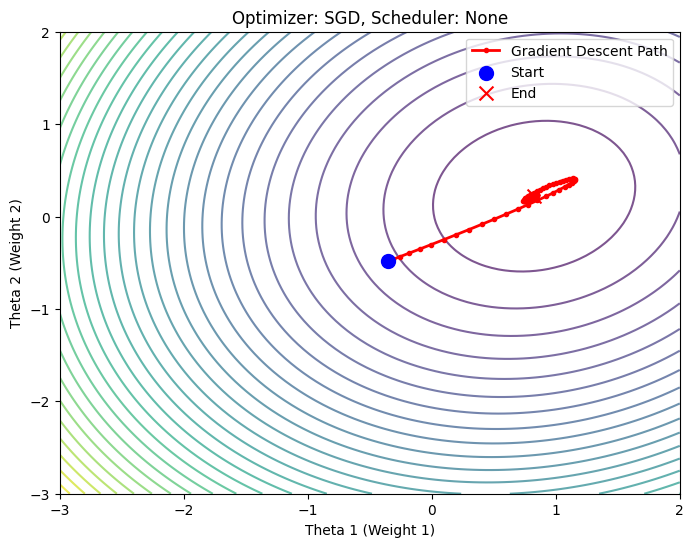

Training with Optimizer: SGD, Scheduler: ExponentialLR
Epoch 0: Loss = 8.306752
Epoch 10: Loss = 2.262984
Epoch 20: Loss = 0.679752
Epoch 30: Loss = 0.670855
Epoch 40: Loss = 0.682076
Epoch 50: Loss = 0.676837
Epoch 60: Loss = 0.671961
Epoch 70: Loss = 0.669115
Epoch 80: Loss = 0.667551
Epoch 90: Loss = 0.666683
Epoch 100: Loss = 0.666190
Epoch 110: Loss = 0.665905
Epoch 120: Loss = 0.665739
Epoch 130: Loss = 0.665640
Epoch 140: Loss = 0.665581
Epoch 150: Loss = 0.665546
Epoch 160: Loss = 0.665526
Epoch 170: Loss = 0.665513
Epoch 180: Loss = 0.665506
Epoch 190: Loss = 0.665501
Final Weights: [0.83304524 0.22017273]


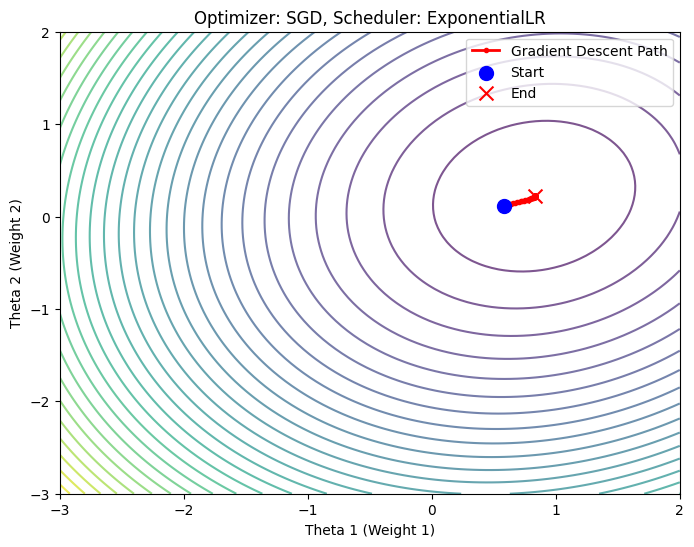

Training with Optimizer: SGD, Scheduler: StepLR
Epoch 0: Loss = 4.463543
Epoch 10: Loss = 0.978341
Epoch 20: Loss = 0.876072
Epoch 30: Loss = 0.779733
Epoch 40: Loss = 0.654449
Epoch 50: Loss = 0.662942
Epoch 60: Loss = 0.655882
Epoch 70: Loss = 0.651680
Epoch 80: Loss = 0.651553
Epoch 90: Loss = 0.651486
Epoch 100: Loss = 0.651358
Epoch 110: Loss = 0.651316
Epoch 120: Loss = 0.651309
Epoch 130: Loss = 0.651308
Epoch 140: Loss = 0.651307
Epoch 150: Loss = 0.651307
Epoch 160: Loss = 0.651307
Epoch 170: Loss = 0.651307
Epoch 180: Loss = 0.651307
Epoch 190: Loss = 0.651307
Final Weights: [0.82533914 0.22032493]


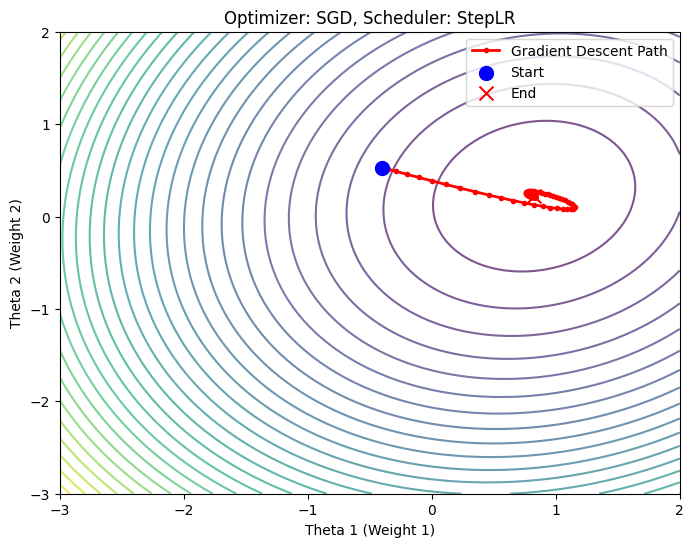

Training with Optimizer: Adam, Scheduler: None
Epoch 0: Loss = 4.887069
Epoch 10: Loss = 4.325637
Epoch 20: Loss = 3.820592
Epoch 30: Loss = 3.362909
Epoch 40: Loss = 2.956064
Epoch 50: Loss = 2.597496
Epoch 60: Loss = 2.284587
Epoch 70: Loss = 2.013636
Epoch 80: Loss = 1.780782
Epoch 90: Loss = 1.582121
Epoch 100: Loss = 1.413832
Epoch 110: Loss = 1.272275
Epoch 120: Loss = 1.154033
Epoch 130: Loss = 1.055942
Epoch 140: Loss = 0.975116
Epoch 150: Loss = 0.908956
Epoch 160: Loss = 0.855148
Epoch 170: Loss = 0.811663
Epoch 180: Loss = 0.776739
Epoch 190: Loss = 0.748860
Final Weights: [0.75348526 0.211396  ]


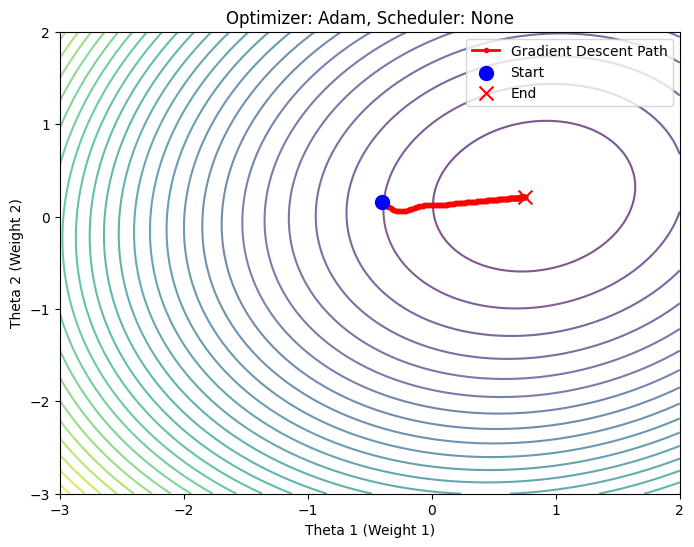

Training with Optimizer: Adam, Scheduler: ExponentialLR
Epoch 0: Loss = 8.745915
Epoch 10: Loss = 8.120198
Epoch 20: Loss = 7.767596
Epoch 30: Loss = 7.564157
Epoch 40: Loss = 7.444848
Epoch 50: Loss = 7.374213
Epoch 60: Loss = 7.332164
Epoch 70: Loss = 7.307050
Epoch 80: Loss = 7.292023
Epoch 90: Loss = 7.283021
Epoch 100: Loss = 7.277627
Epoch 110: Loss = 7.274392
Epoch 120: Loss = 7.272453
Epoch 130: Loss = 7.271292
Epoch 140: Loss = 7.270595
Epoch 150: Loss = 7.270177
Epoch 160: Loss = 7.269928
Epoch 170: Loss = 7.269777
Epoch 180: Loss = 7.269687
Epoch 190: Loss = 7.269633
Final Weights: [-0.3936301   0.06724346]


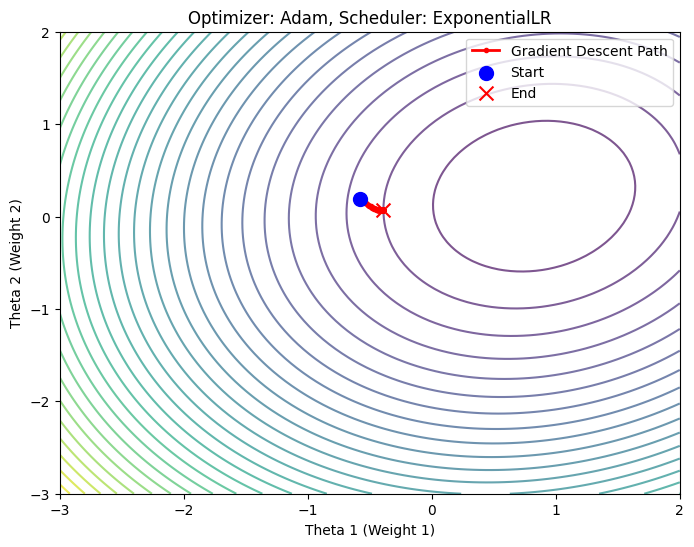

Training with Optimizer: Adam, Scheduler: StepLR
Epoch 0: Loss = 6.204239
Epoch 10: Loss = 5.495993
Epoch 20: Loss = 4.913050
Epoch 30: Loss = 4.435730
Epoch 40: Loss = 4.044829
Epoch 50: Loss = 3.723322
Epoch 60: Loss = 3.457129
Epoch 70: Loss = 3.235070
Epoch 80: Loss = 3.048428
Epoch 90: Loss = 2.890440
Epoch 100: Loss = 2.755834
Epoch 110: Loss = 2.640471
Epoch 120: Loss = 2.541077
Epoch 130: Loss = 2.455029
Epoch 140: Loss = 2.380215
Epoch 150: Loss = 2.314916
Epoch 160: Loss = 2.257723
Epoch 170: Loss = 2.207472
Epoch 180: Loss = 2.163193
Epoch 190: Loss = 2.124078
Final Weights: [0.2510824 0.0825972]


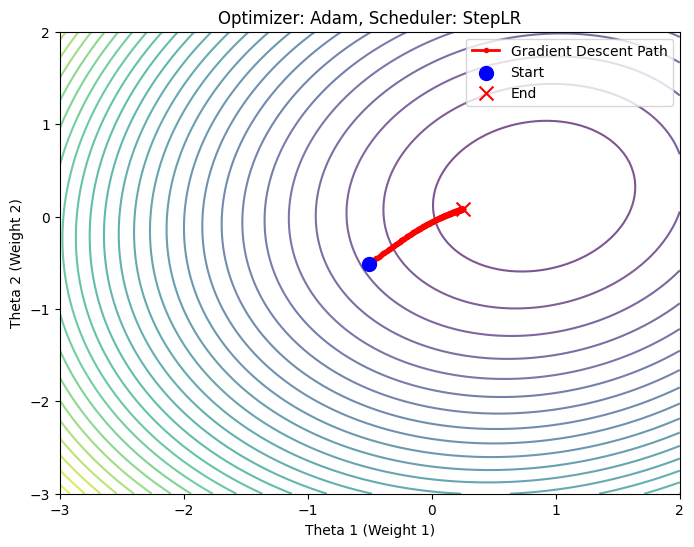

Training with Optimizer: RMSprop, Scheduler: None
Epoch 0: Loss = 10.057920
Epoch 10: Loss = 8.625253
Epoch 20: Loss = 7.798811
Epoch 30: Loss = 7.095766
Epoch 40: Loss = 6.460141
Epoch 50: Loss = 5.874689
Epoch 60: Loss = 5.331801
Epoch 70: Loss = 4.827531
Epoch 80: Loss = 4.360122
Epoch 90: Loss = 3.928739
Epoch 100: Loss = 3.532713
Epoch 110: Loss = 3.171309
Epoch 120: Loss = 2.843584
Epoch 130: Loss = 2.548247
Epoch 140: Loss = 2.283440
Epoch 150: Loss = 2.046391
Epoch 160: Loss = 1.833495
Epoch 170: Loss = 1.641028
Epoch 180: Loss = 1.467051
Epoch 190: Loss = 1.311154
Final Weights: [0.8246466  0.22552262]


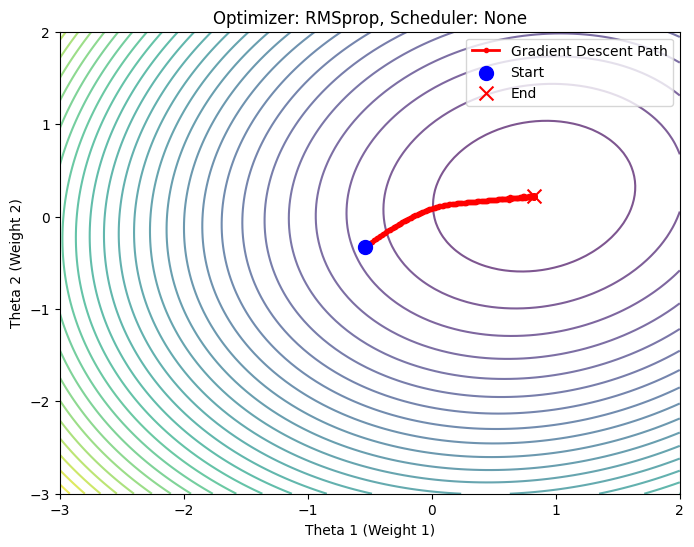

Training with Optimizer: RMSprop, Scheduler: ExponentialLR
Epoch 0: Loss = 5.090867
Epoch 10: Loss = 4.317864
Epoch 20: Loss = 4.060682
Epoch 30: Loss = 3.924215
Epoch 40: Loss = 3.845853
Epoch 50: Loss = 3.799669
Epoch 60: Loss = 3.772188
Epoch 70: Loss = 3.755775
Epoch 80: Loss = 3.745957
Epoch 90: Loss = 3.740082
Epoch 100: Loss = 3.736565
Epoch 110: Loss = 3.734459
Epoch 120: Loss = 3.733199
Epoch 130: Loss = 3.732444
Epoch 140: Loss = 3.731992
Epoch 150: Loss = 3.731722
Epoch 160: Loss = 3.731560
Epoch 170: Loss = 3.731463
Epoch 180: Loss = 3.731405
Epoch 190: Loss = 3.731370
Final Weights: [0.31744558 0.11916062]


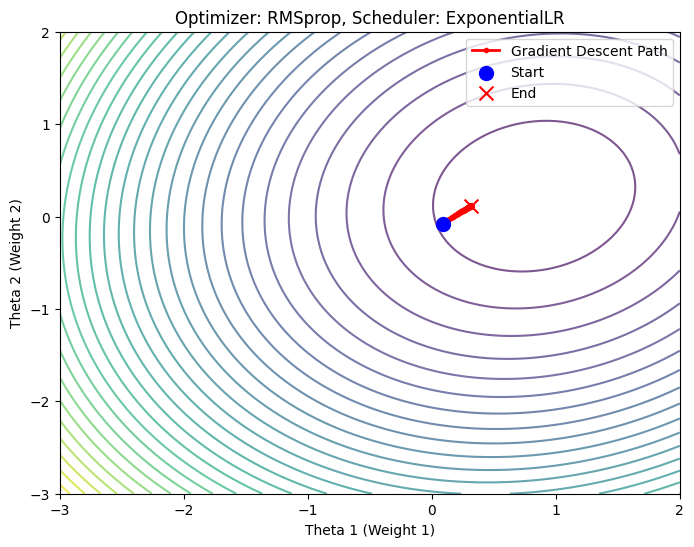

Training with Optimizer: RMSprop, Scheduler: StepLR
Epoch 0: Loss = 6.317809
Epoch 10: Loss = 5.252558
Epoch 20: Loss = 4.730317
Epoch 30: Loss = 4.340730
Epoch 40: Loss = 4.027934
Epoch 50: Loss = 3.769568
Epoch 60: Loss = 3.552692
Epoch 70: Loss = 3.368321
Epoch 80: Loss = 3.209992
Epoch 90: Loss = 3.073172
Epoch 100: Loss = 2.954440
Epoch 110: Loss = 2.850952
Epoch 120: Loss = 2.760307
Epoch 130: Loss = 2.680513
Epoch 140: Loss = 2.609985
Epoch 150: Loss = 2.547494
Epoch 160: Loss = 2.492043
Epoch 170: Loss = 2.442777
Epoch 180: Loss = 2.398959
Epoch 190: Loss = 2.359942
Final Weights: [0.82602775 0.21972488]


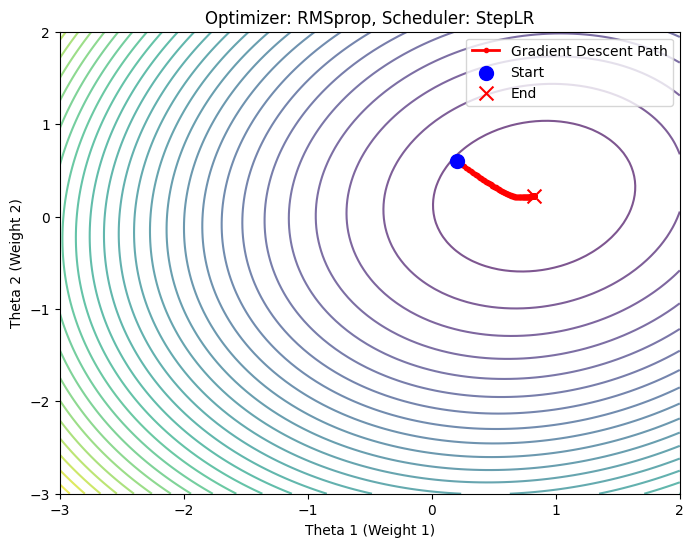

Training with Optimizer: Adagrad, Scheduler: None
Epoch 0: Loss = 6.524689
Epoch 10: Loss = 6.180684
Epoch 20: Loss = 6.011428
Epoch 30: Loss = 5.883672
Epoch 40: Loss = 5.777677
Epoch 50: Loss = 5.685645
Epoch 60: Loss = 5.603546
Epoch 70: Loss = 5.528970
Epoch 80: Loss = 5.460347
Epoch 90: Loss = 5.396581
Epoch 100: Loss = 5.336877
Epoch 110: Loss = 5.280631
Epoch 120: Loss = 5.227377
Epoch 130: Loss = 5.176742
Epoch 140: Loss = 5.128425
Epoch 150: Loss = 5.082178
Epoch 160: Loss = 5.037793
Epoch 170: Loss = 4.995096
Epoch 180: Loss = 4.953937
Epoch 190: Loss = 4.914187
Final Weights: [-0.3065872   0.05108392]


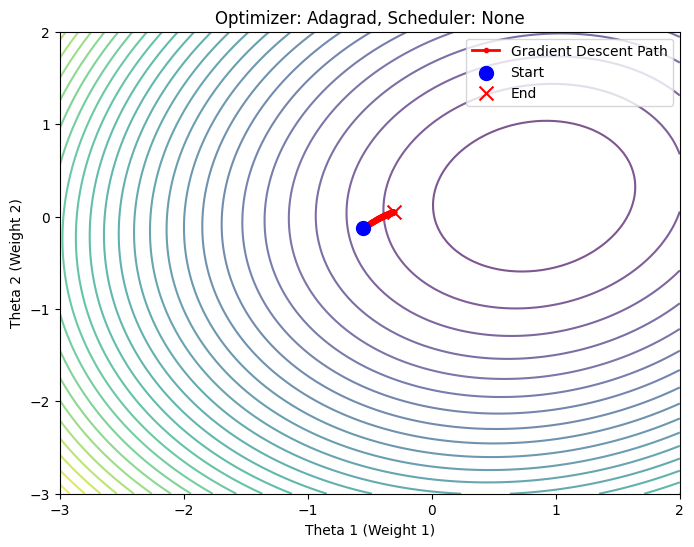

Training with Optimizer: Adagrad, Scheduler: ExponentialLR
Epoch 0: Loss = 7.393062
Epoch 10: Loss = 7.137073
Epoch 20: Loss = 7.063827
Epoch 30: Loss = 7.030396
Epoch 40: Loss = 7.013561
Epoch 50: Loss = 7.004685
Epoch 60: Loss = 6.999879
Epoch 70: Loss = 6.997231
Epoch 80: Loss = 6.995754
Epoch 90: Loss = 6.994923
Epoch 100: Loss = 6.994452
Epoch 110: Loss = 6.994183
Epoch 120: Loss = 6.994030
Epoch 130: Loss = 6.993942
Epoch 140: Loss = 6.993891
Epoch 150: Loss = 6.993862
Epoch 160: Loss = 6.993845
Epoch 170: Loss = 6.993835
Epoch 180: Loss = 6.993829
Epoch 190: Loss = 6.993826
Final Weights: [ 0.7101412  -0.14584044]


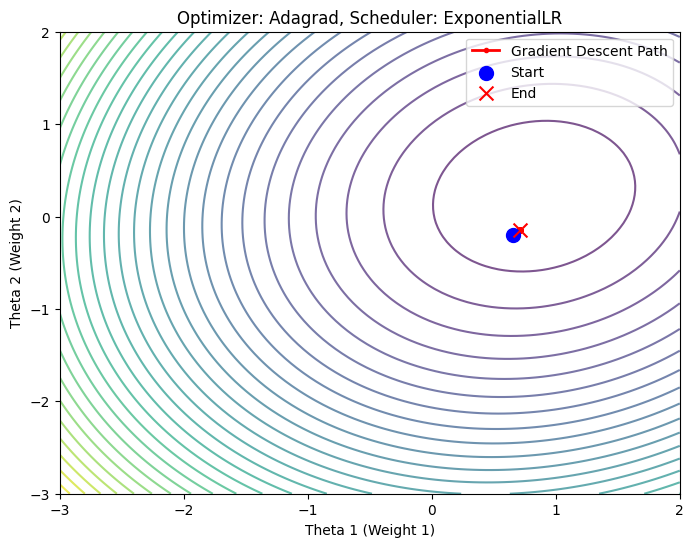

Training with Optimizer: Adagrad, Scheduler: StepLR
Epoch 0: Loss = 8.095577
Epoch 10: Loss = 7.738753
Epoch 20: Loss = 7.580366
Epoch 30: Loss = 7.472328
Epoch 40: Loss = 7.391249
Epoch 50: Loss = 7.327531
Epoch 60: Loss = 7.276059
Epoch 70: Loss = 7.233709
Epoch 80: Loss = 7.198401
Epoch 90: Loss = 7.168674
Epoch 100: Loss = 7.143449
Epoch 110: Loss = 7.121913
Epoch 120: Loss = 7.103432
Epoch 130: Loss = 7.087507
Epoch 140: Loss = 7.073735
Epoch 150: Loss = 7.061789
Epoch 160: Loss = 7.051399
Epoch 170: Loss = 7.042341
Epoch 180: Loss = 7.034431
Epoch 190: Loss = 7.027509
Final Weights: [ 0.34172496 -0.17033517]


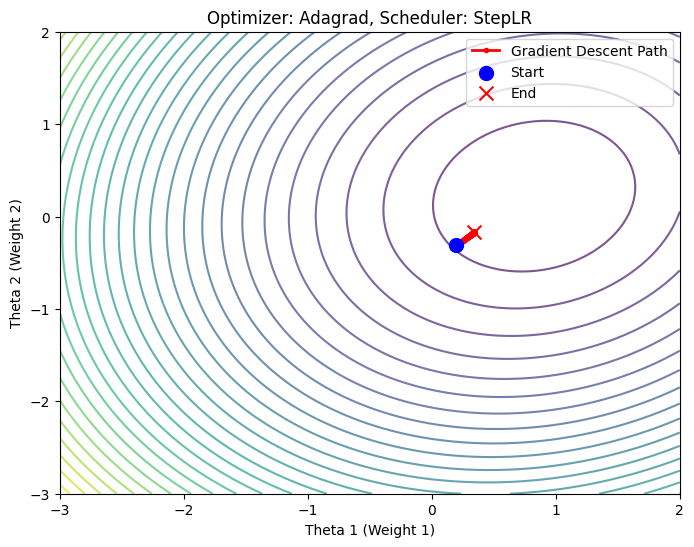

In [11]:
optimizer_list = ["SGD", "Adam", "RMSprop", "Adagrad"]
scheduler_list = [None, "ExponentialLR", "StepLR"]

for opt in optimizer_list:
    for sch in scheduler_list:
        print(f"Training with Optimizer: {opt}, Scheduler: {sch}")
        train_model_and_plot(optimizer_name=opt, scheduler_name=sch, lr=0.01, num_epochs=200)

# 3.

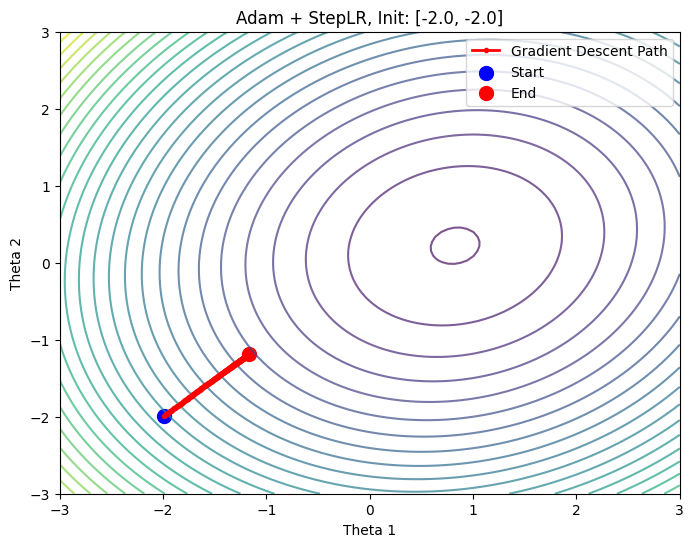

Initial Weights: [-2.0, -2.0], Final Weights: [-1.1679536 -1.186986 ], Final Loss: 7.523547


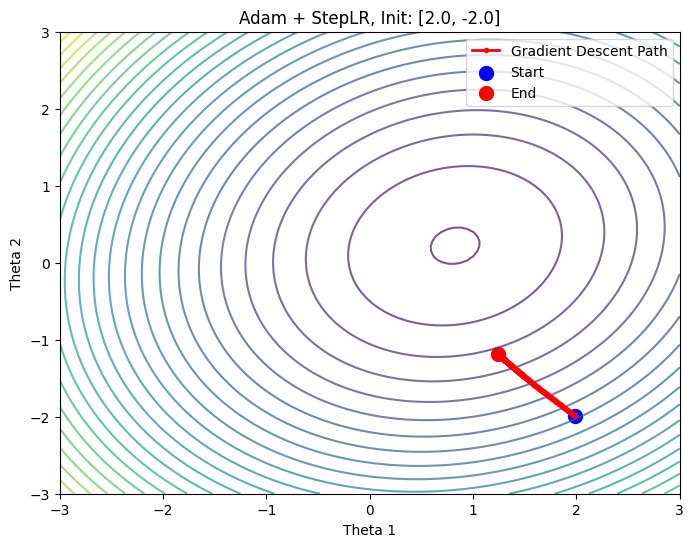

Initial Weights: [2.0, -2.0], Final Weights: [ 1.242733  -1.1878009], Final Loss: 4.550153


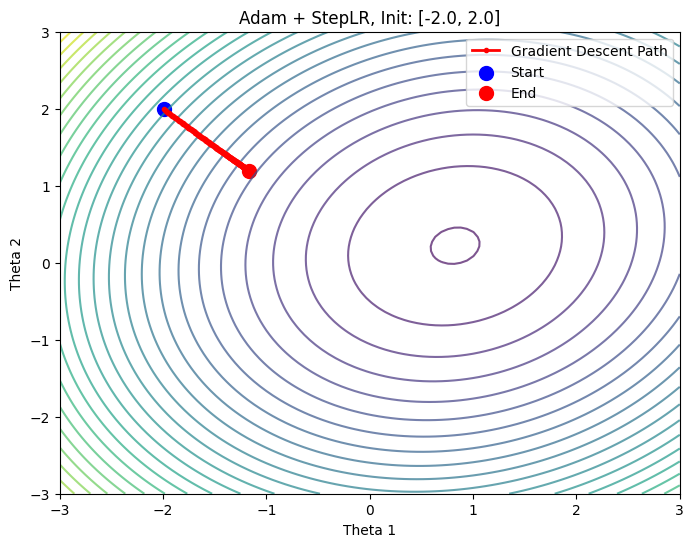

Initial Weights: [-2.0, 2.0], Final Weights: [-1.171437   1.1973606], Final Loss: 7.669799


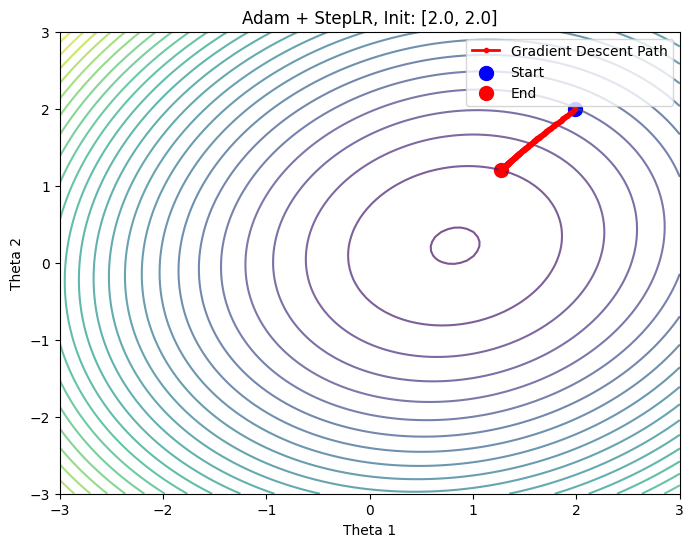

Initial Weights: [2.0, 2.0], Final Weights: [1.267909  1.1993889], Final Loss: 3.297009


In [12]:
initial_weights = [[-2.0, -2.0], [2.0, -2.0], [-2.0, 2.0], [2.0, 2.0]]

for w_init in initial_weights:
    model = nn.Sequential(nn.Linear(2, 1))
    
    # Set initial weights
    with torch.no_grad():
        model[0].weight.copy_(torch.tensor([w_init], dtype=torch.float32))
        model[0].bias.fill_(0.0)

    # Loss และ optimizer
    criterion = nn.MSELoss()
    optimizer, scheduler = get_optimizer_scheduler("Adam", model.parameters(), lr=0.01, scheduler_name="StepLR")
    
    theta_history = []
    loss_history = []

    # Training loop
    num_epochs = 200
    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()
        
        theta_history.append(list(model.parameters())[0].detach().numpy().flatten())
        loss_history.append(loss.item())

    theta_history = np.array(theta_history)

    # Contour plot
    theta1_vals = np.linspace(-3, 3, 100)
    theta2_vals = np.linspace(-3, 3, 100)
    T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
    Z = np.zeros_like(T1)

    for i in range(T1.shape[0]):
        for j in range(T1.shape[1]):
            test_theta = torch.tensor([[T1[i,j], T2[i,j]]], dtype=torch.float32)
            test_output = torch.matmul(X_train, test_theta.T)
            Z[i,j] = torch.mean((test_output - y_train)**2).item()
    
    # Plot
    plt.figure(figsize=(8,6))
    plt.contour(T1, T2, Z, levels=30, cmap="viridis", alpha=0.7)
    plt.plot(theta_history[:,0], theta_history[:,1], "ro-", markersize=3, linewidth=2, label="Gradient Descent Path")
    plt.scatter(theta_history[0,0], theta_history[0,1], color="blue", s=100, label="Start")
    plt.scatter(theta_history[-1,0], theta_history[-1,1], color="red", s=100, label="End")
    plt.xlabel("Theta 1")
    plt.ylabel("Theta 2")
    plt.title(f"Adam + StepLR, Init: {w_init}")
    plt.legend()
    plt.show()
    
    print(f"Initial Weights: {w_init}, Final Weights: {theta_history[-1]}, Final Loss: {loss_history[-1]:.6f}")

# 5.

In [13]:
# @title Full implementation via Torch package for end-to-end training and validation with changing optimizers and schedulers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the California housing dataset
data = fetch_california_housing()

# Get the features and target
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # ใช้ same scaler กับ test set

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [14]:
import torch.nn as nn
import torch.optim as optim

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(in_features=8, out_features=64)  # 8 input features in California housing dataset
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)  # Single output for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



Finished training with Optimizer: Adam, Scheduler: None, Train Loss: 0.2278, Test Loss: 0.2573, R2 Score: 0.8036
Finished training with Optimizer: Adam, Scheduler: StepLR, Train Loss: 0.2428, Test Loss: 0.2639, R2 Score: 0.7986
Finished training with Optimizer: Adam, Scheduler: ExponentialLR, Train Loss: 0.2585, Test Loss: 0.2835, R2 Score: 0.7837
Finished training with Optimizer: RMSprop, Scheduler: None, Train Loss: 0.2502, Test Loss: 0.2650, R2 Score: 0.7978
Finished training with Optimizer: RMSprop, Scheduler: StepLR, Train Loss: 0.2389, Test Loss: 0.2676, R2 Score: 0.7958
Finished training with Optimizer: RMSprop, Scheduler: ExponentialLR, Train Loss: 0.2621, Test Loss: 0.2841, R2 Score: 0.7832
Finished training with Optimizer: Adagrad, Scheduler: None, Train Loss: 0.4393, Test Loss: 0.4536, R2 Score: 0.6539
Finished training with Optimizer: Adagrad, Scheduler: StepLR, Train Loss: 0.5232, Test Loss: 0.5278, R2 Score: 0.5972
Finished training with Optimizer: Adagrad, Scheduler: Exp

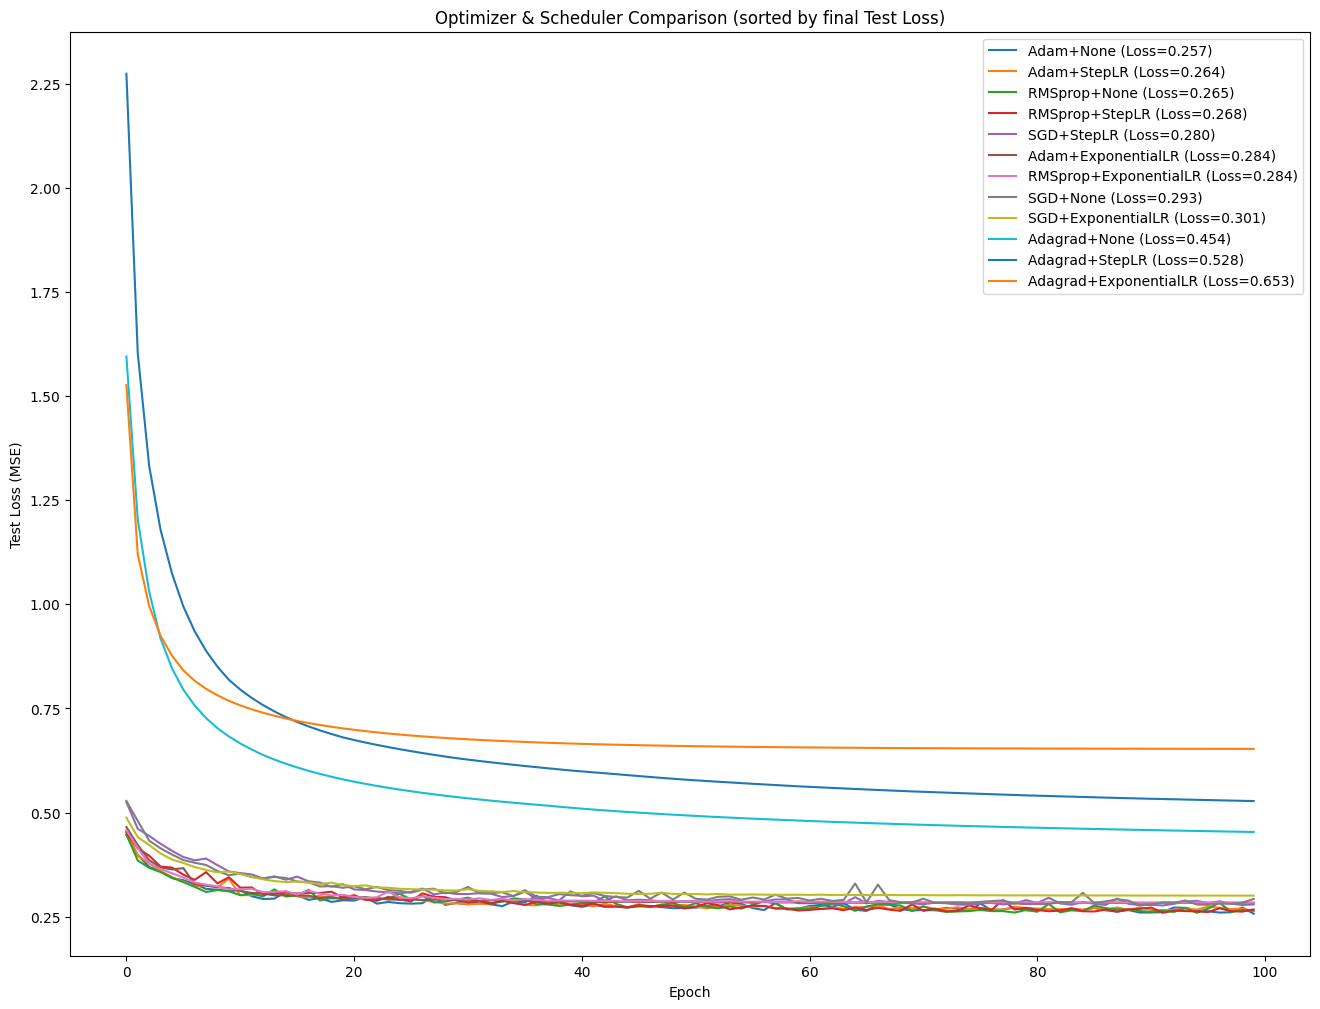

In [15]:
from sklearn.metrics import r2_score

optimizer_names = ["Adam", "RMSprop", "Adagrad", "SGD"]
scheduler_names = [None, "StepLR", "ExponentialLR"]

num_epochs = 100
lr = 0.001

# Store results
results = {}

for opt_name in optimizer_names:
    for sch_name in scheduler_names:
        model = ANN()
        criterion = nn.MSELoss()
        optimizer, scheduler = get_optimizer_scheduler(
            opt_name, model.parameters(), lr, sch_name
        )

        train_losses, test_losses, r2_scores = [], [], []

        for epoch in range(num_epochs):
            # Training
            model.train()
            running_loss = 0.0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            if scheduler:
                scheduler.step()

            train_losses.append(running_loss / len(train_loader))

            # Validation
            model.eval()
            with torch.no_grad():
                test_loss = sum(
                    criterion(model(inputs), targets).item()
                    for inputs, targets in test_loader
                ) / len(test_loader)
                test_losses.append(test_loss)

                r2 = r2_score(
                    y_test_tensor.cpu().numpy(),
                    model(X_test_tensor).detach().cpu().numpy(),
                )
                r2_scores.append(r2)

        results[(opt_name, sch_name)] = (train_losses, test_losses, r2_scores)
        print(
            f"Finished training with Optimizer: {opt_name}, Scheduler: {sch_name}, "
            f"Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, "
            f"R2 Score: {r2_scores[-1]:.4f}"
        )


# --- Sort results by final Test Loss (ascending) ---
sorted_results = sorted(results.items(), key=lambda x: x[1][1][-1])  # x[1][1] = test_losses, [-1] = final

# Print summary after sorting
print("\n=== Results Sorted by Final Test Loss ===")
for (opt_name, sch_name), (train_losses, test_losses, r2_scores) in sorted_results:
    print(
        f"Optimizer: {opt_name:7s}, Scheduler: {str(sch_name):12s}, "
        f"Final Train Loss: {train_losses[-1]:.4f}, "
        f"Final Test Loss: {test_losses[-1]:.4f}, "
        f"Final R²: {r2_scores[-1]:.4f}"
    )

# Optional: plot in sorted order
plt.figure(figsize=(16, 12))
for (opt_name, sch_name), (train_losses, test_losses, r2_scores) in sorted_results:
    plt.plot(test_losses, label=f"{opt_name}+{sch_name} (Loss={test_losses[-1]:.3f})")
plt.xlabel("Epoch")
plt.ylabel("Test Loss (MSE)")
plt.title("Optimizer & Scheduler Comparison (sorted by final Test Loss)")
plt.legend()
plt.show()
